In [204]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder

Import X train

In [205]:
dfX = pd.read_csv('X_train.csv')
dfX.head(5)

,Product category,Product subcategory,Product rating,Transaction number,Transaction date,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Age,State code,Income annual,Occupation level,Income annual.1,Product score 1,Product score 2
0,C2,SC2,9.0,975229,10-05-2022,265758,928785,32.11,1.21,1.12,96.0,32.081101,NaN,NaN,NaN,NaN,NaN,66.165,2.95
1,C2,SC2,1.0,268708,15-06-2022,598533,113357,17.97,0.17,1.19,99.0,18.153294,NaN,NaN,NaN,NaN,NaN,28.955,0.15
2,C2,SC2,3.0,696757,09-04-2022,289082,702163,30.66,0.60,1.69,95.0,30.994194,43.0,7.0,NaN,2.0,945859.0,51.990,0.00
3,C1,SC2,2.0,277371,06-03-2022,912988,672428,100.05,0.63,1.26,37.0,100.680315,NaN,NaN,NaN,NaN,NaN,154.075,-1.15
4,C1,SC2,2.0,133559,28-04-2022,711463,730238,17.99,1.68,1.34,40.0,17.928834,NaN,NaN,NaN,NaN,NaN,30.985,-6.40


Drop Income annual as it is an empty column

In [206]:
print(dfX.columns)
dfX.drop('Income annual', axis=1, inplace=True)


Index(['Product category', 'Product subcategory', 'Product rating',
       'Transaction number', 'Transaction date', 'Customer ID', 'Seller ID',
       'Base Price', 'Discounts percentage', 'Service charge percentage',
       'Product ID', 'Total amount per unit', 'Age', 'State code',
       'Income annual', 'Occupation level', 'Income annual.1',
       'Product score 1', 'Product score 2'],
      dtype='object')


Move Income annual.1 to Income annual

In [207]:
dfX.rename(columns={'Income annual.1': 'Income annual'}, inplace=True)


In [208]:
dfX.head(5)

,Product category,Product subcategory,Product rating,Transaction number,Transaction date,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Age,State code,Occupation level,Income annual,Product score 1,Product score 2
0,C2,SC2,9.0,975229,10-05-2022,265758,928785,32.11,1.21,1.12,96.0,32.081101,NaN,NaN,NaN,NaN,66.165,2.95
1,C2,SC2,1.0,268708,15-06-2022,598533,113357,17.97,0.17,1.19,99.0,18.153294,NaN,NaN,NaN,NaN,28.955,0.15
2,C2,SC2,3.0,696757,09-04-2022,289082,702163,30.66,0.60,1.69,95.0,30.994194,43.0,7.0,2.0,945859.0,51.990,0.00
3,C1,SC2,2.0,277371,06-03-2022,912988,672428,100.05,0.63,1.26,37.0,100.680315,NaN,NaN,NaN,NaN,154.075,-1.15
4,C1,SC2,2.0,133559,28-04-2022,711463,730238,17.99,1.68,1.34,40.0,17.928834,NaN,NaN,NaN,NaN,30.985,-6.40


Import test data

In [209]:
dftest = pd.read_csv('X_test.csv')
dftest.head(5)

,Product category,Product subcategory,Product rating,Transaction number,Transaction date,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Age,State code,Income annual,Occupation level,Income annual.1,Product score 1,Product score 2
0,C2,SC2,2,915523,07-06-2022,346715,593860,35.46,2.02,1.07,104,35.123130,50.0,11.0,NaN,2.0,585624.0,57.190,-8.10
1,C1,SC1,5,758649,20-07-2022,602379,672428,45.51,0.50,1.05,10,45.760305,NaN,NaN,NaN,NaN,NaN,78.265,2.50
2,C1,SC2,6,778420,28-05-2022,185952,435856,64.07,0.83,1.23,50,64.326280,NaN,NaN,NaN,NaN,NaN,108.105,1.85
3,C1,SC1,4,806339,03-07-2022,191883,539784,57.02,1.01,1.01,11,57.020000,NaN,NaN,NaN,NaN,NaN,93.530,-1.05
4,C1,SC2,7,694704,10-04-2022,173274,539784,27.42,0.38,1.17,38,27.636618,NaN,NaN,NaN,NaN,NaN,55.130,5.10


In [210]:
#Drop Income annual as it is an empty column
dftest.drop('Income annual', axis=1, inplace=True)
#Move Income annual.1 to Income annual
dftest.rename(columns={'Income annual.1': 'Income annual'}, inplace=True)

Import Y of training data

In [211]:
dfY = pd.read_csv('Y_train.csv')
dfY.head(5)

,Quantity
0,8
1,18
2,3
3,5
4,10


Move customer details column to dfsurvey as it has lot of empty rows to process separately

In [212]:
# Specify the columns you want to move to a new DataFrame
columns_to_move = ['Age', 'State code', 'Income annual', 'Occupation level', 'Customer ID']
columns_to_drop = ['Age', 'State code', 'Income annual', 'Occupation level']

# Create a new DataFrame with the selected columns
dfsurvey = dfX[columns_to_move].copy()

# Optionally, you can drop the columns from the original DataFrame
dfX.drop(columns=columns_to_drop, inplace=True)
dftest.drop(columns=columns_to_drop, inplace=True)

Training data

In [213]:
dfX['Quantity']=dfY['Quantity']

In [214]:
dfX.isnull().sum()[dfX.isnull().sum()!=0]

Product category             21
Product subcategory          20
Product rating               24
Discounts percentage         12
Service charge percentage    23
Product ID                   29
Total amount per unit        14
Quantity                     24
dtype: int64

Null values as a percentage of total data

In [215]:
Null_values_percentage=(dfX.isnull().sum().sum()/len(dfX))*100
Null_values_percentage

6.958333333333333

In [216]:
dfX=dfX.dropna() #Total Null values are available In dataset are dropped.
dfX.isnull().sum()

Product category             0
Product subcategory          0
Product rating               0
Transaction number           0
Transaction date             0
Customer ID                  0
Seller ID                    0
Base Price                   0
Discounts percentage         0
Service charge percentage    0
Product ID                   0
Total amount per unit        0
Product score 1              0
Product score 2              0
Quantity                     0
dtype: int64

Remove duplicates of same transaction id

In [217]:
has_duplicates = dfX['Transaction number'].duplicated().any()
has_duplicates
dfX_no_duplicates = dfX.drop_duplicates(subset='Transaction number')
dfX = dfX_no_duplicates

In [218]:
len(dfX)

2238

Drop irrelevant columns

In [219]:
dfX=dfX.drop(['Transaction number', 'Customer ID', 'Seller ID'],axis=1)
dftest=dftest.drop(['Transaction number', 'Customer ID', 'Seller ID'],axis=1)

Extract cyclical features from transaction date

In [220]:
dfX['Transaction date'] = pd.to_datetime(dfX['Transaction date'], format='%d-%m-%Y')
dftest['Transaction date'] = pd.to_datetime(dftest['Transaction date'], format='%d-%m-%Y')

In [221]:
# Extract cyclical features for day-of-week and month
dfX['DayOfWeek_sin'] = np.sin(2 * np.pi * dfX['Transaction date'].dt.dayofweek / 7)
dfX['DayOfWeek_cos'] = np.cos(2 * np.pi * dfX['Transaction date'].dt.dayofweek / 7)
dfX['Month_sin'] = np.sin(2 * np.pi * dfX['Transaction date'].dt.month / 12)
dfX['Month_cos'] = np.cos(2 * np.pi * dfX['Transaction date'].dt.month / 12)


In [222]:
# Extract cyclical features for day-of-week and month
dftest['DayOfWeek_sin'] = np.sin(2 * np.pi * dftest['Transaction date'].dt.dayofweek / 7)
dftest['DayOfWeek_cos'] = np.cos(2 * np.pi * dftest['Transaction date'].dt.dayofweek / 7)
dftest['Month_sin'] = np.sin(2 * np.pi * dftest['Transaction date'].dt.month / 12)
dftest['Month_cos'] = np.cos(2 * np.pi * dftest['Transaction date'].dt.month / 12)


Day of Week vs Quantity

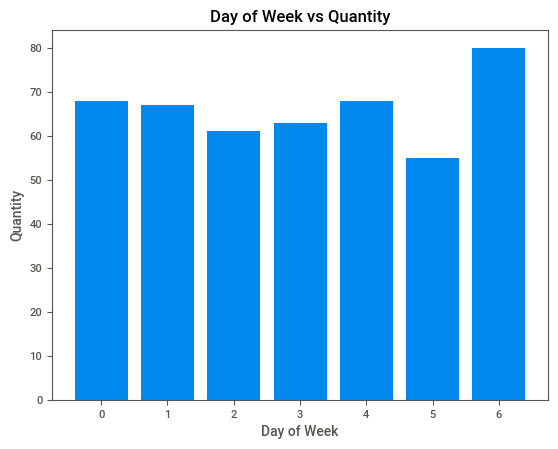

In [223]:
# Create a bar plot
plt.bar(dfX['Transaction date'].dt.dayofweek, dfX['Quantity'])

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Quantity')
plt.title('Day of Week vs Quantity')

# Show the plot
plt.show()

Month vs Quantity

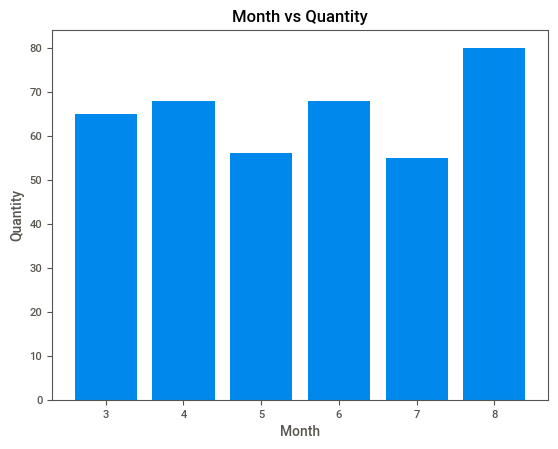

In [224]:
# Create a bar plot
plt.bar(dfX['Transaction date'].dt.month, dfX['Quantity'])

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Month vs Quantity')

# Show the plot
plt.show()

Product rating vs Quantity

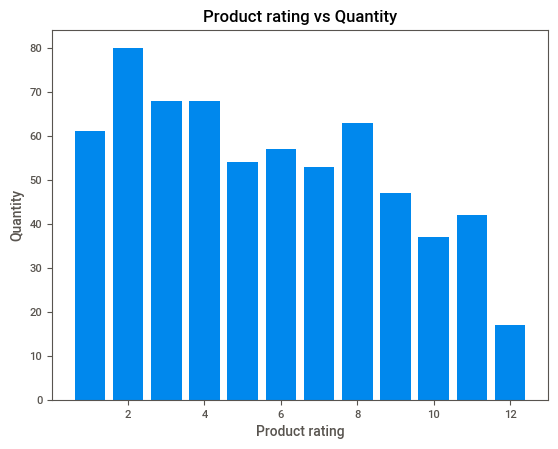

In [225]:
# Create a bar plot
plt.bar(dfX['Product rating'], dfX['Quantity'])

# Add labels and title
plt.xlabel('Product rating')
plt.ylabel('Quantity')
plt.title('Product rating vs Quantity')

# Show the plot
plt.show()

Total amount per unit vs Quantity

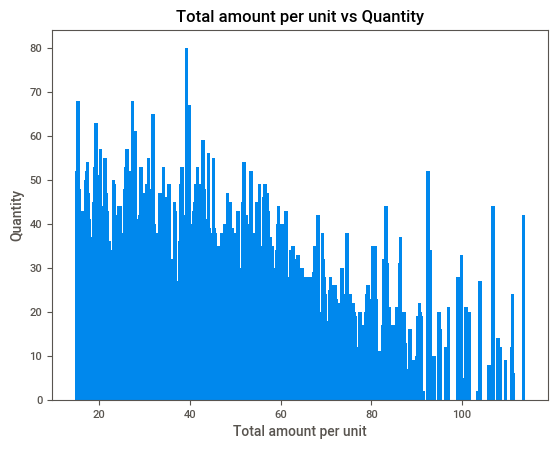

In [226]:
# Create a bar plot
plt.bar(dfX['Total amount per unit'], dfX['Quantity'])

# Add labels and title
plt.xlabel('Total amount per unit')
plt.ylabel('Quantity')
plt.title('Total amount per unit vs Quantity')

# Show the plot
plt.show()

Product ID vs Quantity

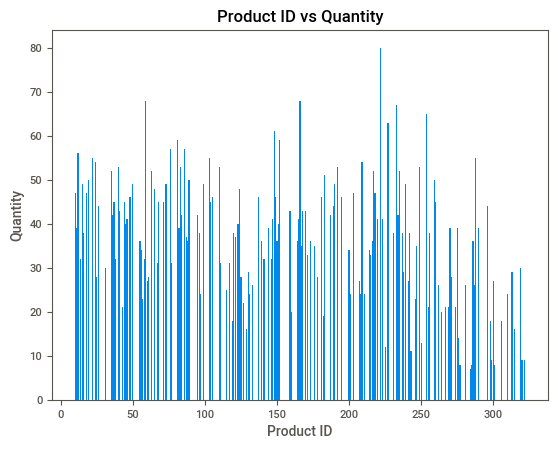

In [227]:
# Create a bar plot
plt.bar(dfX['Product ID'], dfX['Quantity'])

# Add labels and title
plt.xlabel('Product ID')
plt.ylabel('Quantity')
plt.title('Product ID vs Quantity')

# Show the plot
plt.show()

Product score 2 vs Quantity

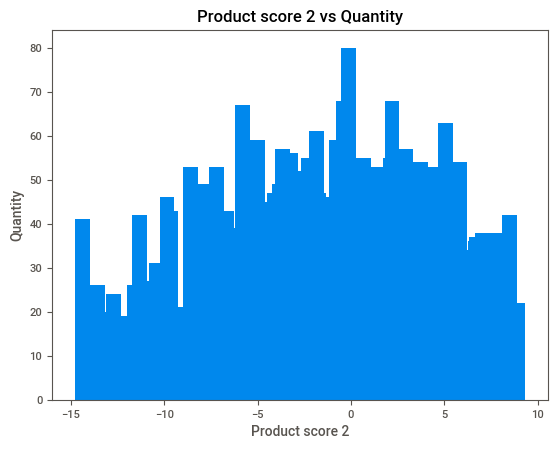

In [228]:
# Create a bar plot
plt.bar(dfX['Product score 2'], dfX['Quantity'])

# Add labels and title
plt.xlabel('Product score 2')
plt.ylabel('Quantity')
plt.title('Product score 2 vs Quantity')

# Show the plot
plt.show()

Month vs Quantity

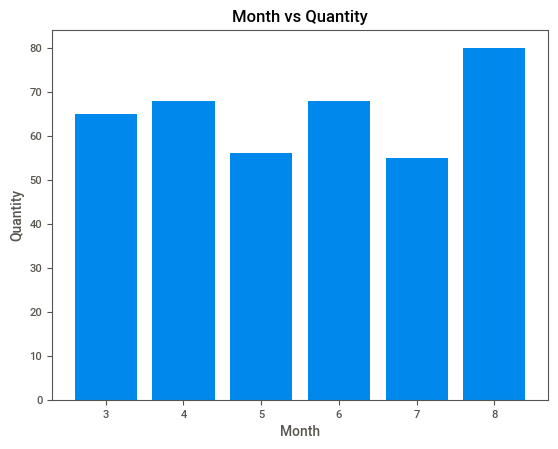

In [229]:
# Create a bar plot
plt.bar(dfX['Transaction date'].dt.month, dfX['Quantity'])

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Month vs Quantity')

# Show the plot
plt.show()

In [230]:
dfX=dfX.drop(['Transaction date'],axis=1)
dftest=dftest.drop(['Transaction date'],axis=1)

Exploratory data analysis

In [231]:
!pip install sweetviz

In [232]:
# Load Packages
import sweetviz as sv

# Analyse Dataset
report = sv.analyze(dfX)


                                             |          | [  0%]   00:00 -> (? left)

In [233]:
# View and Save
# view the feature distribution and details of all features
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Outlier removal

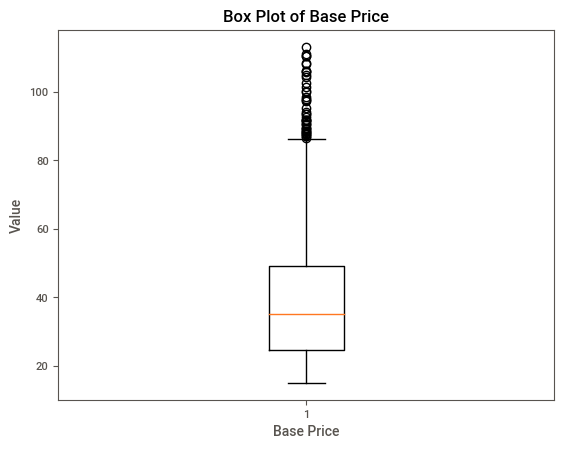

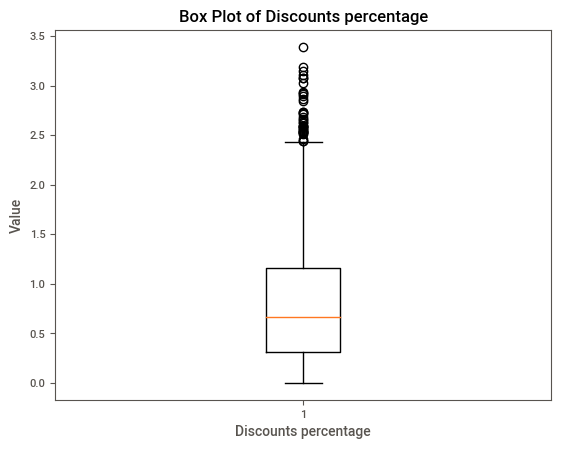

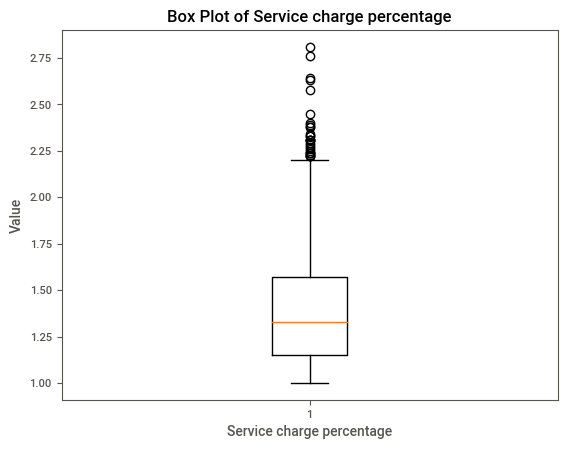

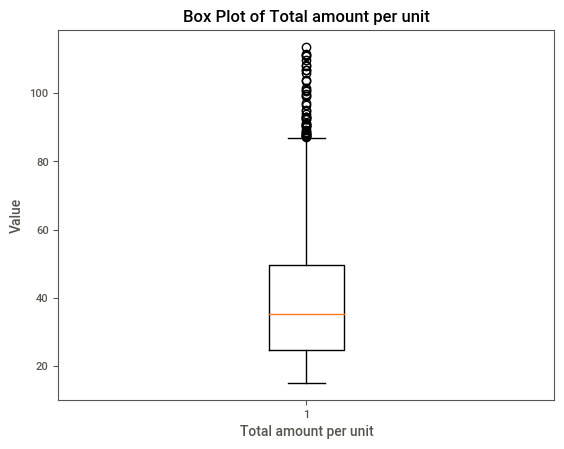

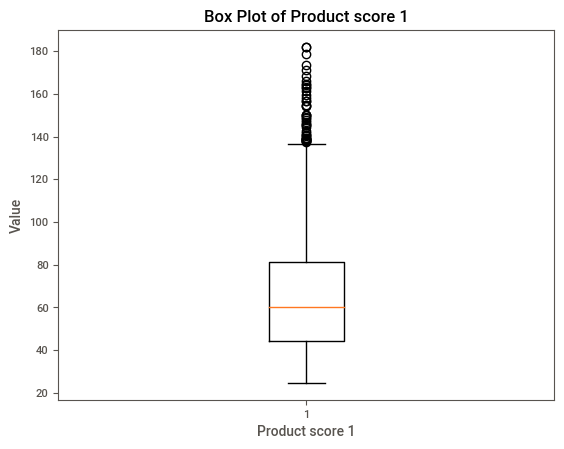

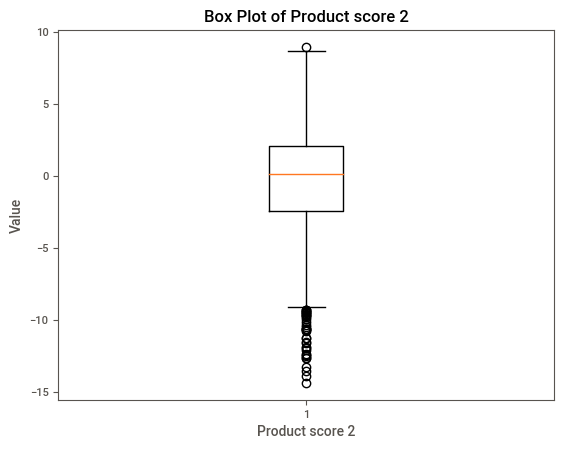

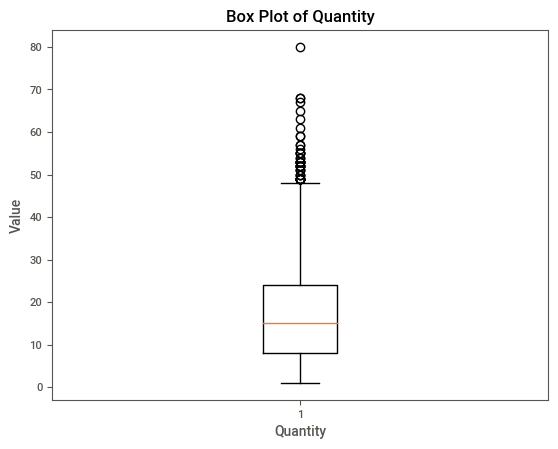

In [234]:
column_names = ['Base Price', 'Discounts percentage', 'Service charge percentage', 'Total amount per unit', 'Product score 1', 'Product score 2', 'Quantity' ]

# Calculate the IQR (Interquartile Range) for each column
IQRs = {}
for column_name in column_names:
    Q1 = dfX[column_name].quantile(0.25)
    Q3 = dfX[column_name].quantile(0.75)
    IQRs[column_name] = Q3 - Q1

# Identify outliers for each column
outliers_dict = {}
for column_name in column_names:
    IQR = IQRs[column_name]
    outliers_dict[column_name] = dfX[(dfX[column_name] < (Q1 - 1.5 * IQR)) | (dfX[column_name] > (Q3 + 1.5 * IQR))]

# Create box plots to visualize outliers for each column
for column_name in column_names:
    plt.boxplot(dfX[column_name])
    plt.xlabel(column_name)
    plt.ylabel('Value')
    plt.title('Box Plot of {}'.format(column_name))
    plt.show()

# Remove outliers
for column_name in column_names:
    df_X = dfX[(dfX[column_name] >= (Q1 - 1.5 * IQR)) & (dfX[column_name] <= (Q3 + 1.5 * IQR))]

Correlation heat map

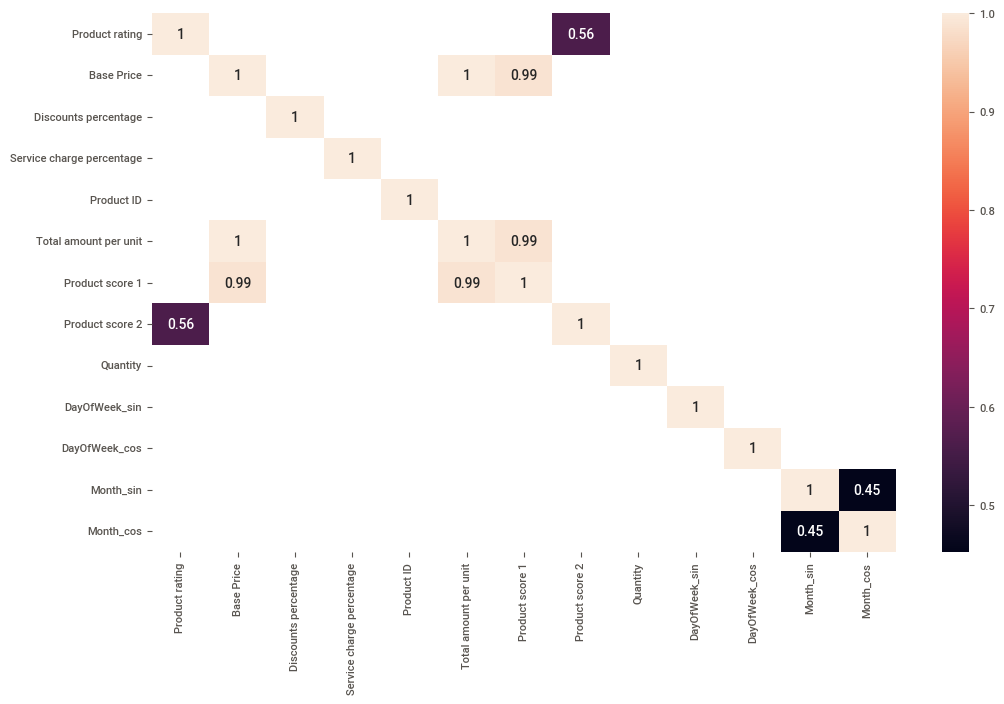

In [235]:
numeric_ = dfX.select_dtypes(include=['int64', 'float64'])
# Compute the correlation matrix
corr = numeric_.corr()
# Create a heatmap
plt.subplots(figsize=[12, 7])
sns.heatmap(corr, annot=True, mask=corr < 0.3)
# Show the plot
plt.show()

In [236]:
# Drop Product score 1, Base Price as their correlation with Total amount per unit is .99
dfX=dfX.drop(['Product score 1', 'Base Price'],axis=1)
dftest=dftest.drop(['Product score 1', 'Base Price'],axis=1)

Principal component analysis

In [237]:
from sklearn.decomposition import PCA
# Perform PCA on Product score 2 and Product rating as their correlation is > 0.5 on training data
# Select the 2 columns to perform PCA on
cols = ['Product score 2', 'Product rating']

# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA object to the data
pca.fit(dfX[cols])

# Get the transformed data
transformed_data = pca.transform(dfX[cols])

dfX['Count_PCA1'] =transformed_data [:, 0]

dfX = dfX.drop(cols ,axis=1)



In [238]:
# Perform PCA on Product score 2 and Product rating as their correlation is > 0.5 on test data
# Select the 2 columns to perform PCA on
cols = ['Product score 2', 'Product rating']

# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA object to the data
pca.fit(dftest[cols])

# Get the transformed data
transformed_data = pca.transform(dftest[cols])

dftest['Count_PCA1'] =transformed_data [:, 0]

dftest = dftest.drop(cols ,axis=1)

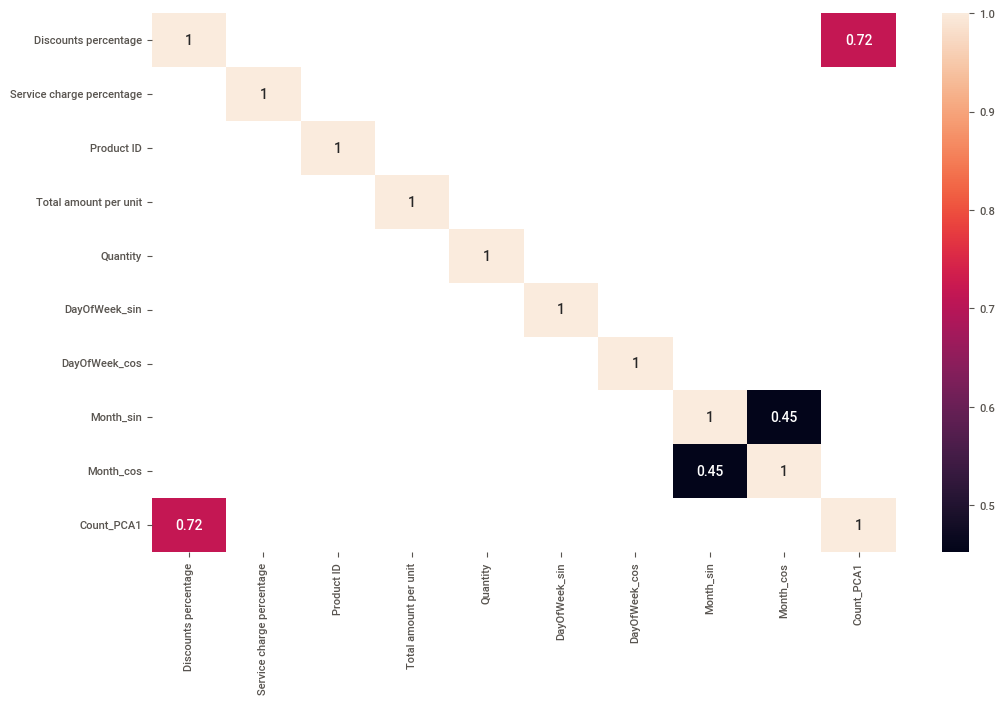

In [239]:
numeric_ = dfX.select_dtypes(include=['int64', 'float64'])
# Compute the correlation matrix
corr = numeric_.corr()
# Create a heatmap
plt.subplots(figsize=[12, 7])
sns.heatmap(corr, annot=True, mask=corr < 0.3)
# Show the plot
plt.show()

In [240]:
# Perform PCA on Count_PCA1 and Discounts percentage as their correlation is > 0.5 on training data
# Select the columns to perform PCA on
cols = ['Count_PCA1', 'Discounts percentage']

# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA object to the data
pca.fit(dfX[cols])

# Get the transformed data
transformed_data = pca.transform(dfX[cols])

dfX['Count_PCA1'] =transformed_data [:, 0]

dfX = dfX.drop(cols ,axis=1)




In [241]:
# Perform PCA on Count_PCA1 and Discounts percentage as their correlation is > 0.5 on test data
# Select the columns to perform PCA on
cols = ['Count_PCA1', 'Discounts percentage']

# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA object to the data
pca.fit(dftest[cols])

# Get the transformed data
transformed_data = pca.transform(dftest[cols])

dftest['Count_PCA1'] =transformed_data [:, 0]

dftest = dftest.drop(cols ,axis=1)




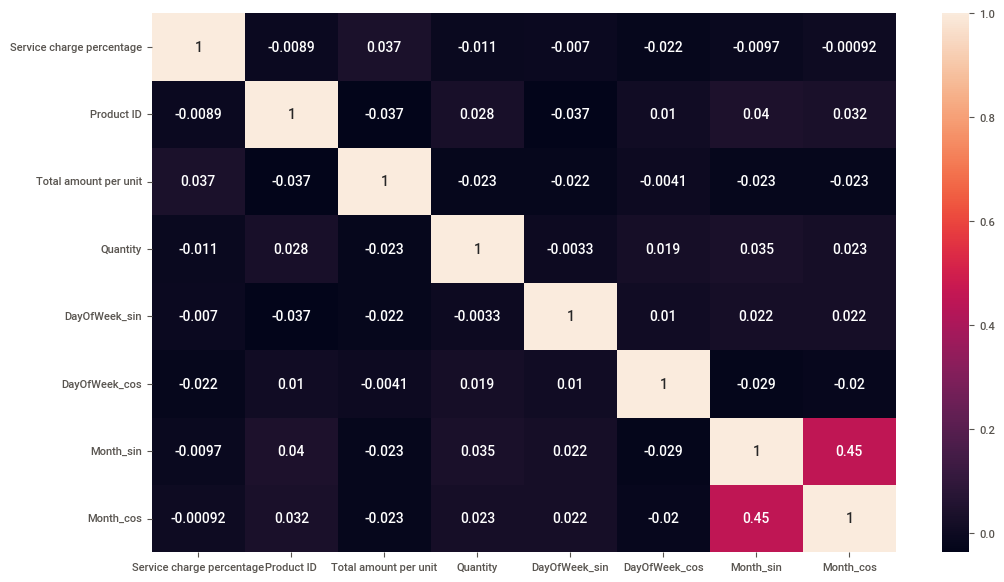

In [242]:
numeric_ = dfX.select_dtypes(include=['int64', 'float64'])
# Compute the correlation matrix
corr = numeric_.corr()
# Create a heatmap
plt.subplots(figsize=[12, 7])
sns.heatmap(corr, annot=True)#, mask=corr < 0.3)
# Show the plot
plt.show()


Label encoding

In [243]:
#Select categorical data
dfX_categorical = dfX.select_dtypes(include=['object']).copy()
dfX_categorical.head()

,Product category,Product subcategory
0,C2,SC2
1,C2,SC2
2,C2,SC2
3,C1,SC2
4,C1,SC2


In [244]:
# label encoding
for i in dfX_categorical.columns:
    dfX[i] = dfX[i].astype('category').cat.codes
    dftest[i] = dftest[i].astype('category').cat.codes

dfX.head(5)

,Product category,Product subcategory,Service charge percentage,Product ID,Total amount per unit,Quantity,DayOfWeek_sin,DayOfWeek_cos,Month_sin,Month_cos
0,1,1,1.12,96.0,32.081101,8.0,0.781831,0.623490,5.000000e-01,-8.660254e-01
1,1,1,1.19,99.0,18.153294,18.0,0.974928,-0.222521,1.224647e-16,-1.000000e+00
2,1,1,1.69,95.0,30.994194,3.0,-0.974928,-0.222521,8.660254e-01,-5.000000e-01
3,0,1,1.26,37.0,100.680315,5.0,-0.781831,0.623490,1.000000e+00,6.123234e-17
4,0,1,1.34,40.0,17.928834,10.0,0.433884,-0.900969,8.660254e-01,-5.000000e-01


Model building

In [245]:
y=dfX['Quantity']
X = dfX.drop(columns=['Quantity'])


In [246]:
X.head()
y.head()

0     8.0
1    18.0
2     3.0
3     5.0
4    10.0
Name: Quantity, dtype: float64

In [247]:
y.value_counts()

2.0     92
7.0     88
3.0     86
4.0     83
13.0    81
        ..
56.0     1
67.0     1
65.0     1
63.0     1
80.0     1
Name: Quantity, Length: 64, dtype: int64

In [248]:
X.describe()
x_dtypes = X.dtypes
x_dtypes

Product category                int8
Product subcategory             int8
Service charge percentage    float64
Product ID                   float64
Total amount per unit        float64
DayOfWeek_sin                float64
DayOfWeek_cos                float64
Month_sin                    float64
Month_cos                    float64
dtype: object

LinearRegression - Mean Squared Error: 147.38, R-squared: -0.00, Root Mean Squared Error: 12.14
Lasso - Mean Squared Error: 146.80, R-squared: -0.00, Root Mean Squared Error: 12.12
DecisionTreeRegressor - Mean Squared Error: 321.26, R-squared: -1.19, Root Mean Squared Error: 17.92
RandomForestRegressor - Mean Squared Error: 158.38, R-squared: -0.08, Root Mean Squared Error: 12.58
Ridge - Mean Squared Error: 147.38, R-squared: -0.00, Root Mean Squared Error: 12.14
Pipeline - Mean Squared Error: 150.77, R-squared: -0.03, Root Mean Squared Error: 12.28


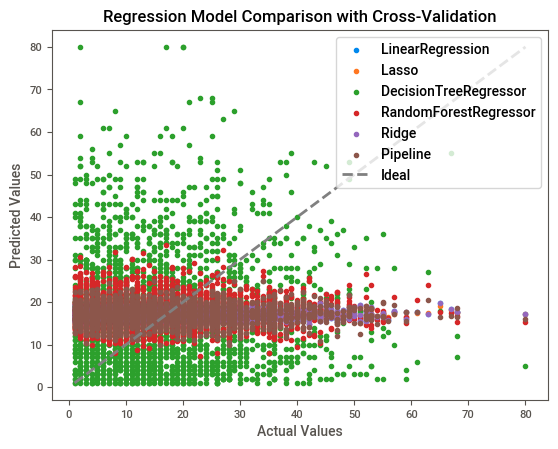

In [249]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from math import sqrt


# Specify the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize models
linear_reg = LinearRegression()
lasso_reg = Lasso(alpha=0.1)
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
ridge_reg = Ridge(alpha=0.1)
poly_reg = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=0.1))



models = [linear_reg, lasso_reg, tree_reg, forest_reg, ridge_reg, poly_reg]

# Evaluate models using k-fold cross-validation
for model in models:
    model_name = model.__class__.__name__
    y_pred = cross_val_predict(model, X, y, cv=kf)

    # Evaluate the model
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = sqrt(mse)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}, Root Mean Squared Error: {rmse:.2f}")

    # Plot predictions vs. actual values
    plt.scatter(y, y_pred, label=model_name)

plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray', linewidth=2, label='Ideal')
plt.title('Regression Model Comparison with Cross-Validation')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()




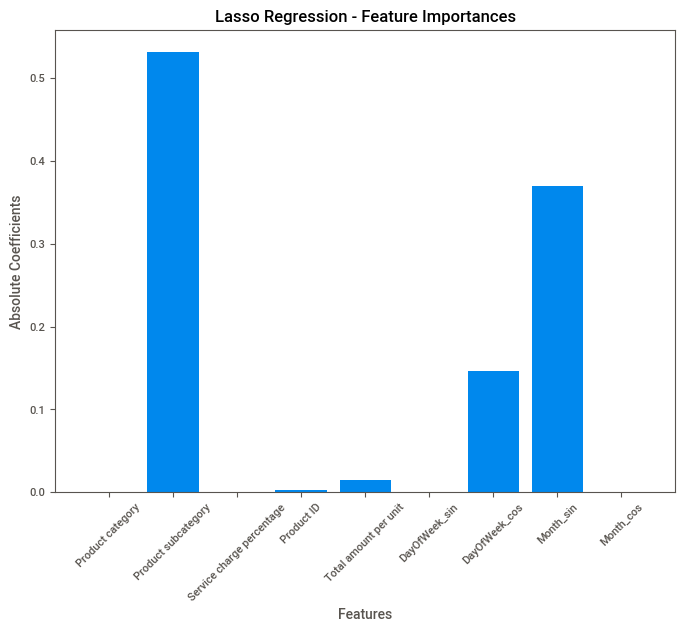

In [250]:
lasso_reg.fit(X, y)
# Extract feature coefficients
feature_coefficients = lasso_reg.coef_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_coefficients)), np.abs(feature_coefficients))
plt.xticks(range(len(feature_coefficients)), X.columns, rotation=45)
plt.title('Lasso Regression - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficients')
plt.show()

In [251]:
print(np.abs(feature_coefficients))
print(X.columns)

[0.         0.53154019 0.         0.00301545 0.01437006 0.
 0.14668028 0.36969809 0.        ]
Index(['Product category', 'Product subcategory', 'Service charge percentage',
       'Product ID', 'Total amount per unit', 'DayOfWeek_sin', 'DayOfWeek_cos',
       'Month_sin', 'Month_cos'],
      dtype='object')


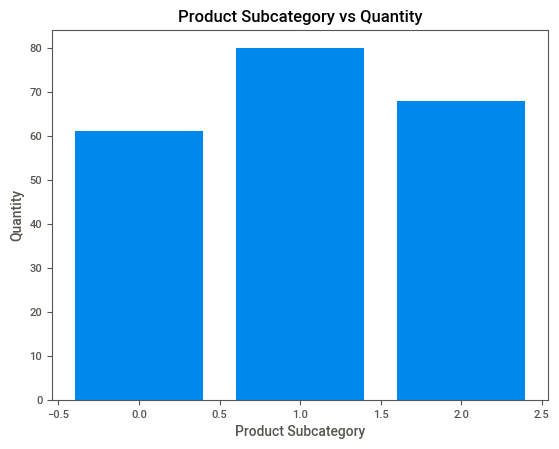

In [252]:
# Create a bar plot
plt.bar(dfX['Product subcategory'], dfX['Quantity'])

# Add labels and title
plt.xlabel('Product Subcategory')
plt.ylabel('Quantity')
plt.title('Product Subcategory vs Quantity')

# Show the plot
plt.show()

In [253]:
#copy Y test to predictions
predictions = lasso_reg.predict(dftest)

In [254]:
# Create a DataFrame with predicted values
results_df = pd.DataFrame({'Y_pred_group11': predictions})

# Save the results DataFrame to a CSV file
results_csv_file_path = 'Y_pred_group11.csv'
results_df.to_csv(results_csv_file_path, index=False)

print(f'Predictions saved to {results_csv_file_path}')


Predictions saved to Y_pred_group11.csv
